In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns

## lets take a peek int that data

the im.db is and sqlite data base so lets create a  connection

In [31]:
# creating connection with im.db database

# this is due to how i arranged the files so data is in the main repo
# and so the ../ goes back to main repo and the into data
# and for some reason the im.db is in a im.db file
imdb_connection = sqlite3.connect('../data/im.db/im.db')

# lets take a pick
cursor = imdb_connection.cursor()

cursor.execute('''
SELECT name FROM sqlite_master WHERE type = 'table'
''') 
data = cursor.fetchall()
data

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [32]:
#load the bom.movie gross

bom_gross = pd.read_csv('../data/bom.movie_gross.csv')

# it is funny because this early int the lifetime of bom_gross we already don't want duplicates
bom_gross.drop_duplicates()

# but we can live with null values since we don't know what we are walking into

# get the colums of the bom_gross
bom_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [33]:
bom_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [34]:
bom_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

so it seems like the the bom_gross has data about the profits and business side of things in the business
This is perfect if you are looking to get into the movie making business ;)

In [35]:
cursor.execute('''
PRAGMA table_info(writers)
''')
info_writters = cursor.fetchall()
info_writters

[(0, 'movie_id', 'TEXT', 0, None, 0), (1, 'person_id', 'TEXT', 0, None, 0)]

### ratings

it seems like it is a rating for 0 -> 10 

In [36]:
# let see what each look like
cursor.execute('''
SELECT averagerating FROM movie_ratings as ratings LIMIT 5
''')
data = cursor.fetchall()
data

[(8.3,), (8.9,), (6.4,), (4.2,), (6.5,)]

In [37]:
cursor.execute('''
SELECT akas.title, rating.averagerating FROM movie_ratings AS rating INNER JOIN movie_akas AS akas ON rating.movie_id = akas.movie_id
''')
akas_tittle_rating = cursor.fetchall()
akas_tittle_rating


[('Just Inès', 6.4),
 ('Just Inès', 6.4),
 ('Samo Ines', 6.4),
 ('Hercules - La leggenda ha inizio', 4.2),
 ('Hercules 3D', 4.2),
 ('Hercules: The Legend Begins', 4.2),
 ("Hercules: ha'agada matkhila", 4.2),
 ('Herkul: Početak legende', 4.2),
 ('Herkules legendája', 4.2),
 ('Herkül: Efsane Basliyor', 4.2),
 ('Huyên Thoai Hercules', 4.2),
 ('Hércules', 4.2),
 ('Hércules - A Lenda Começa', 4.2),
 ('Hércules: El origen de la leyenda', 4.2),
 ('Iraklis: I arhi tou thrylou', 4.2),
 ('La leyenda de Hércules', 4.2),
 ('La leyenda de Hércules', 4.2),
 ('La leyenda de Hércules', 4.2),
 ('La leyenda de Hércules', 4.2),
 ("La légende d'Hercule", 4.2),
 ("La légende d'Hercule", 4.2),
 ('Legenda Herkulesa', 4.2),
 ('Legenda lui Hercule', 4.2),
 ('Legenda o Herkulu', 4.2),
 ('Legjenda e Herkulit', 4.2),
 ('The Hercules', 4.2),
 ('The Legend of Hercules', 4.2),
 ('The Legend of Hercules', 4.2),
 ('Untitled Hercules Project', 4.2),
 ('Za Herakuresu', 4.2),
 ('Ηρακλής: Η αρχή του θρύλου', 4.2),
 ('Гера

## Create a runtime vs other factors data frame


In [38]:
sql_query = '''
SELECT rating.averagerating AS rating, basics.runtime_minutes AS runtime , basics.genres FROM movie_basics AS basics INNER JOIN movie_ratings AS rating ON basics.movie_id = rating.movie_id
'''
rating_vs_runtime = pd.read_sql_query(sql_query,imdb_connection)

rating_vs_runtime.head(10)

,rating,runtime,genres
0,7.0,175.0,"Action,Crime,Drama"
1,7.2,114.0,"Biography,Drama"
2,6.9,122.0,Drama
3,6.1,NaN,"Comedy,Drama"
4,6.5,80.0,"Comedy,Drama,Fantasy"
5,4.1,NaN,"Horror,Thriller"
6,8.1,83.0,"Adventure,Animation,Comedy"
7,6.8,136.0,Drama
8,4.6,100.0,History
9,7.6,180.0,Documentary


In [42]:
# remove the data that has null values for rating vs runtime

real_data = rating_vs_runtime.dropna(subset=['rating','runtime'])
real_data = real_data[['runtime','rating']]
real_data.head(10)

,runtime,rating
0,175.0,7.0
1,114.0,7.2
2,122.0,6.9
4,80.0,6.5
6,83.0,8.1
7,136.0,6.8
8,100.0,4.6
9,180.0,7.6
10,89.0,6.9
11,60.0,7.5


In [50]:
print('the max rating is ',real_data['rating'].max())
print('the max lengthe of movies is :', real_data['runtime'].max())

the max rating is  10.0
the max lengthe of movies is : 51420.0


### runtime vs rating plot

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_lim'

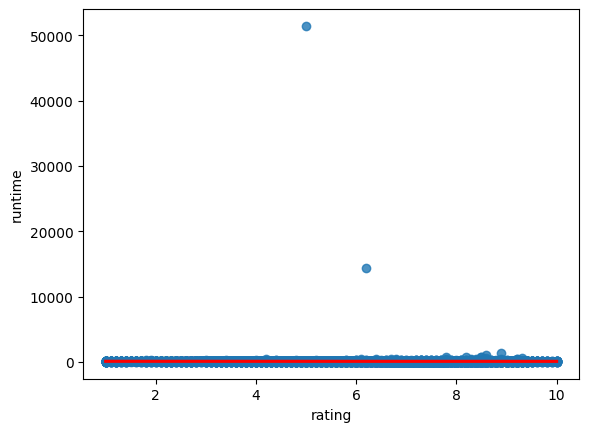

In [48]:
sns.regplot(x='rating',y='runtime',data=real_data, line_kws={'color': 'red'})
plt.x_lim(0,real_data['rating'].max())
plt.y_lim(0,real_data['runtime'].max())

#### wiered their is a movie that was 50000 hours long , since i have never seen the movie i will ignore it
this will also help the data regression plot look better , same for the one that was 10000 long, people must be idle or it
must be game of thrones.

In [56]:
# get the index of those 2 movies
indexes = real_data.nlargest(3,'runtime')

# remove them for the list since people are have not finished watching them
# real_data.drop(index=indexes)
indexes

,runtime,rating
70280,51420.0,5.0
27683,14400.0,6.2
15171,1440.0,8.9


(0.0, 1440.0)

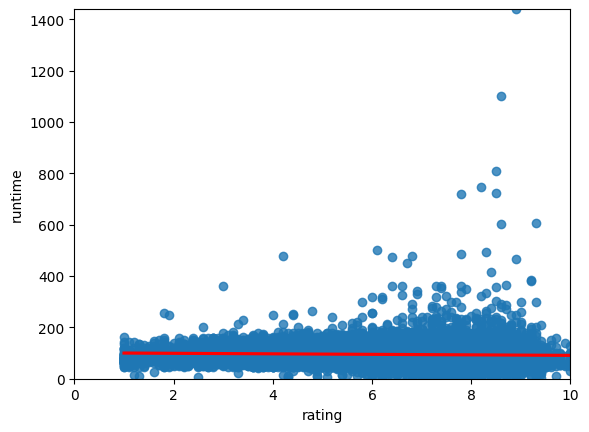

In [57]:
sns.regplot(x='rating',y='runtime',data=real_data, line_kws={'color': 'red'})
plt.xlim(0,real_data['rating'].max())
# i am using the 3rd largest data as a the maximum
plt.ylim(0,1440.0)

#### still not very insightfull since their are really long movies wonder how long it would take to make a 1400 hour movie
I assume the company i a advicing does not want to find this out through the hard way and is planning on making resonable movies

In [63]:
# i will shave out the movie runtimes that are in tails of the normal distribution

# we know that the tails of this distibuiton are within 2 uinits of standard deviation from the meand

mean = real_data['runtime'].mean()
std = real_data['runtime'].std()
print('The meand is :', mean ,'And the standard deviation is ', std)

# crazy this data is so unique the std is way greater than the mean by far
# will put the lower limit to be just the shortest movie the idea is to put the upper limit to be mean + 2* std
upper_limit = mean + 2 * std
# if the runtime is greater than the upper limit drop it
condition = real_data['runtime'] <= upper_limit
reduced_data = real_data[condition]
reduced_data


The meand is : 94.6540400990398 And the standard deviation is  208.57411133795523


,runtime,rating
0,175.0,7.0
1,114.0,7.2
2,122.0,6.9
4,80.0,6.5
6,83.0,8.1
...,...,...
73849,130.0,8.4
73850,86.0,6.2
73851,75.0,6.2
73852,98.0,8.7


<Axes: xlabel='rating', ylabel='runtime'>

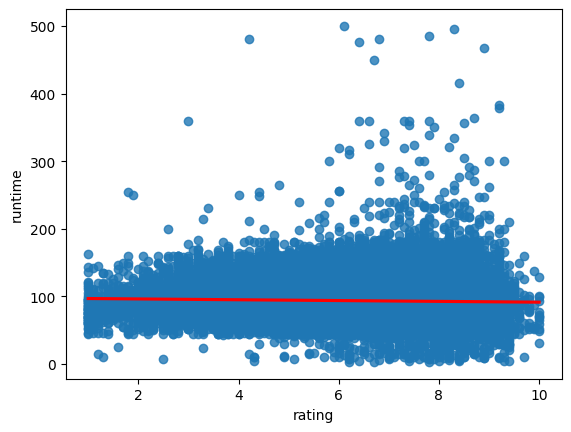

In [68]:
sns.regplot(x='rating', y='runtime', data=reduced_data, line_kws={'color' : 'red'})


so it seems movies time has little correlation so should look into other factors as seen from the staight line

In [ ]:
# ok i am curious which one is more accurate primary_tittle in the movie basics or tittle on akas
cursor.execute('''
SELECT basics.primary_title, rating.averagerating FROM movie_ratings AS rating INNER JOIN movie_basics as basics ON rating.movie_id = basics.movie_id
''')
basics_primary_tittle_ratings = cursor.fetchall()
basics_primary_tittle_ratings


[('Laiye Je Yaarian', 8.3),
 ('Borderless', 8.9),
 ('Just Inès', 6.4),
 ('The Legend of Hercules', 4.2),
 ('Até Onde?', 6.5),
 ('Habana Eva', 6.2),
 ('The Hammer', 7.0),
 ('The Night Clerk', 6.4),
 ('Silent Sonata', 7.2),
 ('Vanquisher', 4.2),
 ('Baggage Claim', 5.1),
 ('The Four-Faced Liar', 5.8),
 ('Jack and the Cuckoo-Clock Heart', 7.0),
 ('Buried Prayers', 8.0),
 ('Black Widow', 5.5),
 ("Maverick and Ariel's First Ever Ever Movie Hollywood or Else... (Ang pinakamahabang title ng movie sa balat ng lupa)",
  5.8),
 ('Moneyball', 7.6),
 ('Hereafter', 6.5),
 ('Why I Did (Not) Eat My Father', 5.0),
 ('Mission: Impossible - Ghost Protocol', 7.4),
 ('21 Jump Street', 7.2),
 ('VIPs', 6.6),
 ('Aloha', 5.4),
 ('Under the Boardwalk: The Monopoly Story', 6.2),
 ('War of the Gods', 4.0),
 ('Sex and the City 2', 4.4),
 ('Quartier lointain', 7.0),
 ('Hunter Prey', 5.8),
 ("Don't Be Afraid of the Dark", 5.6),
 ('Small Apartments', 6.1),
 ('Weddings and Other Disasters', 5.4),
 ('Burning Palms', 5.

In [ ]:
# ok i a for how movei that have 

In [ ]:
len(akas_tittle_rating) - len(basics_primary_tittle_ratings) 

187950

In [ ]:
len(akas_tittle_rating)

261806

so it seems that the movie tittles are more in inline whith waht is akas table than the primary tittle in basics table but cannot be sure it relates with the grass csv and by a large margine the difference is greater than 100,000. i don't think basics primary tittle
is recovering from this when i merge it with the csv file for this reason my choice for tittle will be akas

### merging the bom.gross.csv with the ratings based on names

In [ ]:
# now lets get the ratings and tittles as a data frame

sql_querry = '''
SELECT akas.title AS title, rating.averagerating AS rating FROM movie_ratings AS rating INNER JOIN movie_akas AS akas ON rating.movie_id = akas.movie_id
'''
names_ratings_df = pd.read_sql_query(sql_querry,imdb_connection)
# say no to duplicates
names_ratings_df.drop_duplicates()
names_ratings_df.info

<bound method DataFrame.info of                                                     title  rating
0                                               Just Inès     6.4
1                                               Just Inès     6.4
2                                               Samo Ines     6.4
3                        Hercules - La leggenda ha inizio     4.2
4                                             Hercules 3D     4.2
...                                                   ...     ...
261801                                     Да се разкриеш     6.3
261802     Code Geass: Lelouch of the Rebellion - Emperor     7.5
261803  Code Geass: Lelouch of the Rebellion - Glorifi...     7.5
261804   Code Geass: Lelouch of the Rebellion Episode III     7.5
261805   Code Geass: Lelouch of the Rebellion Episode III     7.5

[261806 rows x 2 columns]>

In [ ]:
# let us first ensure that the names of in both the csv and the list are the same as in the db

# cleanup leading spaces in the names_ratings_db and bom.gross

names_ratings_df['title'] = names_ratings_df['title'].astype(str).str.strip()
bom_gross['title'] = bom_gross['title'].astype(str).str.strip()

# now i am going to make everything lowercase
names_ratings_df['title'] = names_ratings_df['title'].str.lower()
bom_gross['title'] = bom_gross['title'].str.lower()

# I now pronounce both the dataframe as one you may now merge the bride
gross_rating_df = pd.merge(
    names_ratings_df,
    bom_gross,
    left_on='title',
    right_on='title',
    how='inner'
)
gross_rating_df.set_index('title')
# drop the tittle column
gross_rating_df.drop_duplicates(inplace=True)

gross_rating_df.head


NameError: name 'names_ratings_df' is not defined

### top 10 studios

In [ ]:
studio_gross_sum = gross_rating_df.groupby('studio')['total_gross'].sum()
print('Top 10 sudios in terms of the gross income')
print(studio_gross_sum.sort_values(ascending = False).head(10))

NameError: name 'gross_rating_df' is not defined

so first of all notice that we have lost alot of info we had 200k values of movies with ratings, and now we have 11k , but i would say lost since we really are using what we know about the values we are using so here it seems like we will be using the t-test

## Hypthesis tests

so i have some hypthesis i would love to test and see
    1.short runtime minutes have better reviews this is because , short attention span
    2.high ratings movie have higher ratings
    3.moveis that are known for somebody have higher rating 
    3.persons involved in Engineering have higher ratings

### Lets start with the high movie rating have have gross 

H_0 = movies with high movie gross do not have a high movie rating

H_1 = movies with a high movie gross have high movie rating

In [ ]:
print('the type for domesitic gross is : ' ,gross_rating_df['domestic_gross'].dtype)
gross_rating_df['foreign_gross'].dtype

the type for domesitic gross is :  float64


dtype('O')

In [ ]:
# --- Aggressively clean and convert both columns to numeric ---
gross_rating_df= gross_rating_df.dropna(subset=['domestic_gross','foreign_gross'])

# 1. Clean and convert 'domestic_gross' (safe to re-run)
gross_rating_df['domestic_gross'] = pd.to_numeric(
    gross_rating_df['domestic_gross'].astype(str).str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)

# 2. Clean and convert 'foreign_gross' (This is the critical step for dtype('O'))
gross_rating_df['foreign_gross'] = pd.to_numeric(
    gross_rating_df['foreign_gross'].astype(str).str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)


# 3. Verify the data types (Should now both be float64)
print("--- Final Verified Data Types ---")
print(gross_rating_df[['domestic_gross', 'foreign_gross']].dtypes)


# 4. Create the 'total_gross' column
gross_columns = ['domestic_gross', 'foreign_gross']
gross_rating_df['total_gross'] = gross_rating_df[gross_columns].sum(axis=1)

print("\n--- DataFrame with New 'total_gross' Column ---")
print(gross_rating_df[['domestic_gross', 'foreign_gross', 'total_gross']].head())

--- Final Verified Data Types ---
domestic_gross    float64
foreign_gross     float64
dtype: object

--- DataFrame with New 'total_gross' Column ---
    domestic_gross  foreign_gross  total_gross
0       18800000.0     42400000.0   61200000.0
2       21600000.0       887000.0   22487000.0
4              0.0      3400000.0    3400000.0
6       75600000.0     34600000.0  110200000.0
11      32700000.0     72500000.0  105200000.0


In [ ]:
from scipy.stats import pearsonr

ratings = gross_rating_df['rating']
gross = gross_rating_df['total_gross']

corelation_coeff, p_value = pearsonr(ratings,gross)

print('The correlation coefficient is :', corelation_coeff)
print('The p_value is : ', p_value)

significance = 0.5
if p_value < significance:
    print('Reject the null hypothesis H_0 is statistically not true')
else :
    print('fail to reject the null hypothesis')

The correlation coefficient is : 0.10716530025152718
The p_value is :  2.6696947694094456e-10
Reject the null hypothesis H_0 is statistically not true


so this is high rating movies have higher gross income but the correlation is low so we finde something else to work one

In [ ]:
# lets get a full data structure with time of the movie with numerous other variables.

## Test correlation between the time and the rating

I naturally assume that for a movie with short runtime will affect the ratings

## Test the correlation between the time and the gross profit

This could be promising alot